# 2.- Learn basic manipulation and mathematic operations on PyTorch tensors

## What is a tensor (PyTorch)?

A tensor is a multi-dimensional array. In PyTorch, this comes from a generalization of the notation of variables that exists on more than two dimensions.

*   zero-dimensional variables are points,
*   one-dimensional variables are vectors,
*   two-dimensional variables are matrices,
*   and three or more dimensional variables, are tensors.

In [186]:
import torch

In [187]:
x0 = torch.Tensor([7]) # This is a point
x0

tensor([7.])

In [188]:
x1 = torch.Tensor([15, 64, 123]) # This is a vector
x1

tensor([ 15.,  64., 123.])

In [189]:
x2 = torch.Tensor([[3, 6, 5],
                   [7, 9, 12],
                   [10, 33, 1]]) # This is a matrix
x2

tensor([[ 3.,  6.,  5.],
        [ 7.,  9., 12.],
        [10., 33.,  1.]])

In [190]:
x3 = torch.Tensor([[[[1, 0, 0],
                     [0, 1, 0],
                     [0, 0, 1]],
                    [[2, 0, 1],
                     [0, 2, 3],
                     [4, 1, 5]]]]) # This is a tensor
x3

tensor([[[[1., 0., 0.],
          [0., 1., 0.],
          [0., 0., 1.]],

         [[2., 0., 1.],
          [0., 2., 3.],
          [4., 1., 5.]]]])



---



Arithmetic operations are applied to each element inside the tensor

In [192]:
# Define a tensor of any dimension
x = torch.Tensor([[1, 3, 2], [4, 5, 7]])
x

# Define "y" as two times "x" plus five
y = 2 * x + 5
y

tensor([[ 7., 11.,  9.],
        [13., 15., 19.]])

The same happens with functions, e.g., trigonometric functions

In [196]:
# Apply a trigonometric function (e.g., sin, cos, tan) on "x"
z = torch.tan(2 * x + 5)
z

tensor([[ 8.7145e-01, -2.2595e+02, -4.5232e-01],
        [ 4.6302e-01, -8.5599e-01,  1.5159e-01]])

Arithmetic operations between two tensors can be applied as well

In [200]:
x = torch.Tensor([1, 3, 4, 7])
y = torch.Tensor([2, 5, 1, 1])

# Compute "z" as the sum of "x" and "y"
z = x / y
z

tensor([0.5000, 0.6000, 4.0000, 7.0000])

**Important** -- Check the shape of the tensors first!

In [201]:
r = torch.Tensor([[1, 2], [4, 5]])
s = torch.Tensor([4, 5, 10, 11, 5])

t = r + s # This will generate an error because r and s does not have the same shape

RuntimeError: ignored

Use the tensor's property *.shape* to know the shape of that tensor

In [204]:
r.shape

torch.Size([2, 2])

### From Numpy to Torch
If you are familiar with Numpy's arrays, you can convert them into PyTorch's tensors as follows

In [205]:
import numpy as np

In [206]:
x_np = np.array([1, 2, 3, 4])

# Define "x_pt" as a PyTorch's Tensor version of "x_np"
x_pt = torch.from_numpy(x_np)

In [207]:
x_pt

tensor([1, 2, 3, 4])

In [209]:
x_np

array([1, 2, 3, 4])



---



# How are tensors used in Deep Learning?

We store images in form of two-dimensional tensors for black and white, gray-scale images, and as three-dimensional tensors for color images (RGB).

In [210]:
import matplotlib.pyplot as plt
import skimage

In [211]:
# Load some images as numpy arrays
im_bw = skimage.data.camera()
im_bw.shape

(512, 512)

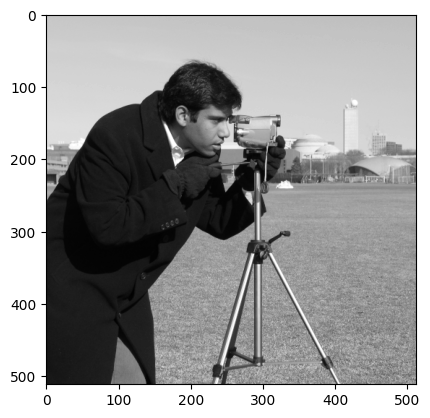

In [212]:
plt.imshow(im_bw, cmap="gray")

In [213]:
im_bw[:5, :5]

array([[200, 200, 200, 200, 199],
       [200, 199, 199, 200, 199],
       [199, 199, 199, 200, 200],
       [200, 200, 199, 199, 199],
       [200, 200, 200, 200, 199]], dtype=uint8)

In [214]:
im_color = skimage.data.astronaut()
im_color.shape

(512, 512, 3)

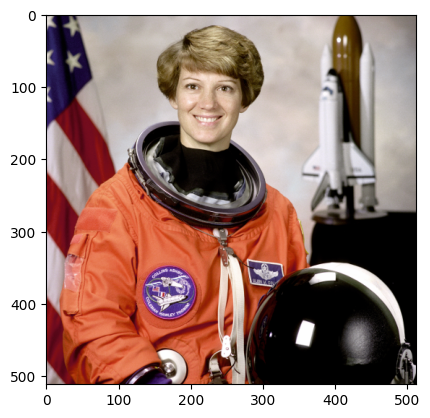

In [215]:
plt.imshow(im_color)

In [216]:
im_color[:5, :5, :]

array([[[154, 147, 151],
        [109, 103, 124],
        [ 63,  58, 102],
        [ 54,  51,  98],
        [ 76,  76, 106]],

       [[177, 171, 171],
        [144, 141, 143],
        [113, 114, 124],
        [106, 107, 120],
        [128, 128, 131]],

       [[201, 194, 193],
        [182, 178, 175],
        [168, 165, 164],
        [159, 157, 157],
        [167, 165, 161]],

       [[220, 213, 210],
        [214, 206, 206],
        [202, 198, 196],
        [197, 191, 193],
        [200, 194, 196]],

       [[232, 223, 223],
        [226, 220, 215],
        [221, 215, 210],
        [215, 210, 206],
        [221, 211, 213]]], dtype=uint8)

For convenience, PyTorch's tensors are stored with the channels axis before the spatial (X, Y) axis.
So, lets permute the axes after converting the image to a PyTorch's tensor.

In [218]:
x = torch.from_numpy(im_color)

# Permute the axes of "x", so we have the color axes first, then cast the type of "x" into float type
x = x.permute(2, 0, 1)
x.shape

torch.Size([3, 512, 512])

In [219]:
print("Numpy original:", im_color.dtype)
print("PyTorch Tensor:", x.dtype)

Numpy original: uint8
PyTorch Tensor: torch.uint8


Cast the type of data from integers to floating points, so we can apply functions that return continuous variables.

In [221]:
# Get the mean, and standard deviation of the pixel values of "x"
x = x.float()

x.mean(), x.std()

(tensor(114.5990), tensor(81.2304))

In [222]:
print("Numpy original:", im_color.dtype)
print("PyTorch Tensor:", x.dtype)

Numpy original: uint8
PyTorch Tensor: torch.float32


## Training with mini-batches of images

PyTorch can operate efficiently on multiple images at the same time.
To do that, we need to stack these images into a single tensor first.

That is because operations in PyTorch expect the images to have the following axes order **B,C,H,W**
1.   **B**: Batch size,
2.   **C**: Number of Channels,
3.   **H**: Height, and
4.   **W**: Width

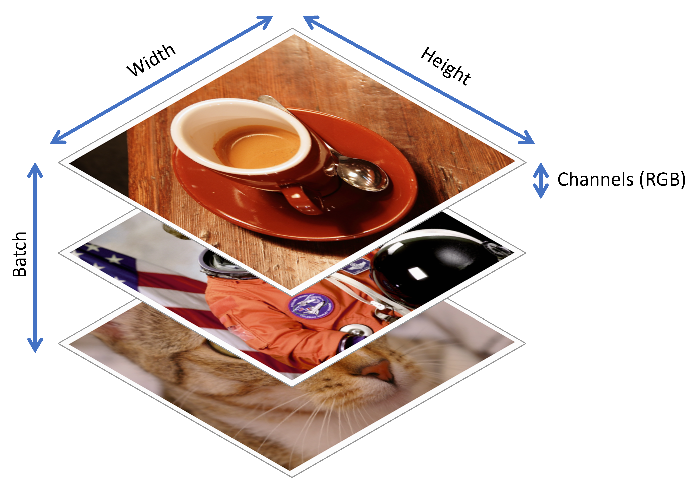

In [223]:
im1 = skimage.data.astronaut()
x1 = torch.from_numpy(im1).permute(2, 0, 1)
x1 = x1.float()

im2 = skimage.data.cat()
x2 = torch.from_numpy(im2).permute(2, 0, 1)
x2 = x2.float()

print(x1.shape)
print(x2.shape)

torch.Size([3, 512, 512])
torch.Size([3, 300, 451])


Crop, resize, apply color transformations to images, so these are of the same shape and number of channels.

In [224]:
# Take a patch of size 256x256 pixels from each image
x1_crop = x1[:, :256, :256]
x2_crop = x2[:, :256, :256]

# Stack the patches into a batch of tensors at dimension 0
batch = torch.stack( (x1_crop, x2_crop), dim=0)
batch.shape

torch.Size([2, 3, 256, 256])



---



# PyTorch's building blocks


Deep learning models are defined as hierarchical transformations arranged as *layers*.
Each *layer* takes an input (the original image, or from a previous layer) and  computes its output using some **operations** and **functions**.
Then that output is used as input for the next layer ...

## Convolution layers

The most common operation in DL models for image processing are Convolution operations.

![2D Convolution](https://upload.wikimedia.org/wikipedia/commons/8/85/Convolution_arithmetic_-_Full_padding_no_strides_transposed.gif)

The animation shows the convolution of a 7x7 pixels input image (bottom) with a 3x3 pixels kernel (moving window), that results in a 5x5 pixels output (top).

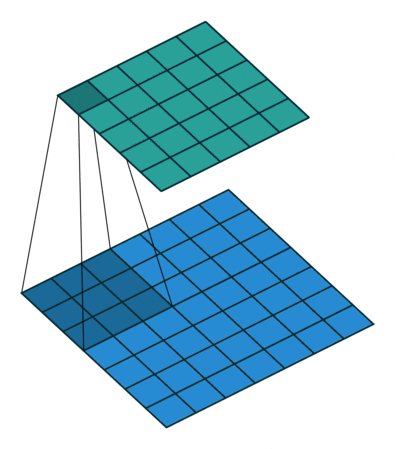

### The effect of convolution operations

In [253]:
kernel = torch.Tensor([[
    [[0, 0, 0],
     [0, 0, 0],
     [0, 0, 0]], # This part of the Kernel will operate on the Red channel of the images

    [[0, 0, 0],
     [0, 0, 0],
     [0, 0, 0]], # This part of the Kernel will operate on the Green channel of the images

    [[0, -1, 0],
     [-1, 5, -1],
     [0, -1, 0]], # This part of the Kernel will operate on the Blue channel of the images
    ]])

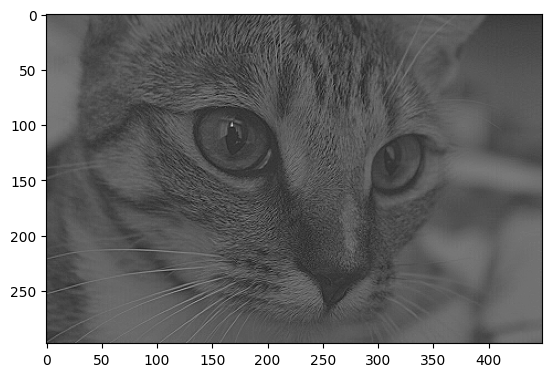

In [252]:
#@title Result of the convolution between an image and the kernel
im = skimage.data.cat()

x = torch.from_numpy(im).float().permute(2, 0, 1)

# We add a "dummy" dimension to our tensor "x" so it has the BCHW axes
x = x[None, ...]

# Use the con2d function from torch.nn.functional
output = torch.nn.functional.conv2d(x, kernel, padding=0)
output.shape

plt.imshow(output[0, 0], cmap="gray")

Experiment with different values and shapes of the kernel
https://en.wikipedia.org/wiki/Kernel_(image_processing)



---



### Convolution layers from torch.nn module

In [278]:
# Use the Conv2d module from torch.nn to define a learnable convolution layer
conv_1 = torch.nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3)

In [279]:
y = conv_1(x)
y.shape

torch.Size([1, 3, 298, 449])

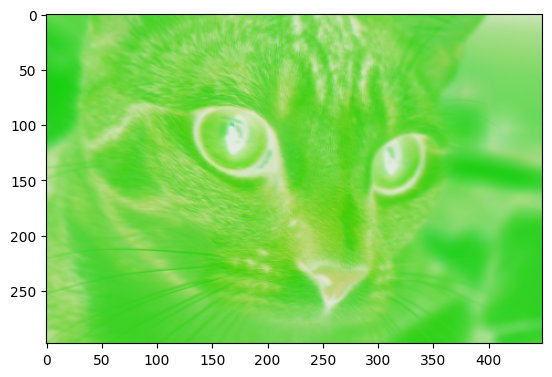

In [280]:
#@title Visualize the output of the randomly initialized kernel of the convolution layer
plt.imshow((y[0].detach().permute(1, 2, 0) - y[0].detach().min()) / (y[0].detach().max() - y[0].detach().min()))

## Linear layers

These layers perform matrix-matrix, and matrix-vector operations on its corresponding inputs. Linear layers are commonly used in final layers to obtain the output of the model.

For classification tasks, these layers project a multi-channel feature map into a single prediction of the image's class.

![Inception V3](https://wngaw.github.io/images/inception_v3_architecture.png)

In object detection and localization problems, these layers generate the detection confidence and bounding box of the object.

![YOLO](https://viso.ai/wp-content/uploads/2021/02/yolo-object-detection.jpg)

### Linear layers from torch.nn

In [281]:
# Use the Linear module from torch.nn to define a linear operation
lin_1 = torch.nn.Linear(in_features=16 * 16 * 3, out_features=10)

In [282]:
x_win = x[..., :16, :16]
x_win.shape

torch.Size([1, 3, 16, 16])

In [283]:
x_flat = x_win.reshape(1, 3 * 16 * 16)
x_flat.shape

torch.Size([1, 768])

In [284]:
# When it is needed, reshape the input of the linear layer, so we can perform the operation correctly
fx = lin_1(x_flat)
fx.shape

torch.Size([1, 10])



---



## Non-linear activation layers

These layers are integrated to add non-linear behavior into the neural network.

In [ ]:
# Define a Rectified Linear Unit (ReLU) layer using the torch.nn module
relu_1 = torch.nn.ReLU()

In [285]:
x_seq = torch.linspace(-10, 10, 200)

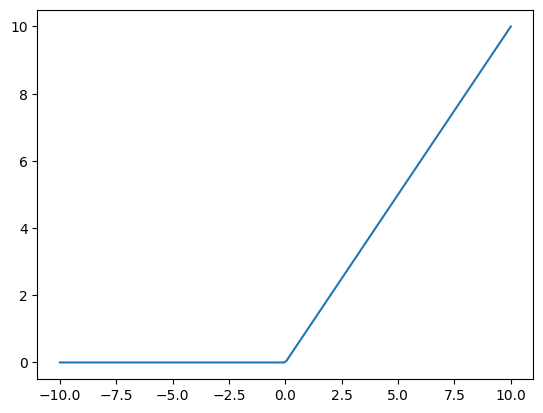

In [286]:
plt.plot(x_seq, relu_1(x_seq))

A list of activation layers here https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity



---



## Pooling layers

This kind of layers are used to downsample the current feature maps which helps to summarize information from large regions into a couple of pixels.

There are two common pooling operations: maximum pooling, and average pooling.

Maximum pooling looks for the maximum value in a region and returns it as a single pixel. While average pooling computes the average value for that region.

In [294]:
# Define a Maximum Pooling layer from torch.nn module
max_pool = torch.nn.MaxPool2d(kernel_size=5, stride=5)

In [295]:
fx = max_pool(x)
fx.shape

torch.Size([1, 3, 60, 90])

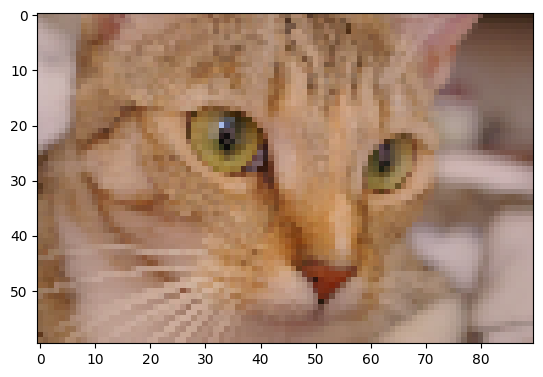

In [296]:
plt.imshow(fx[0].permute(1, 2, 0) / 255)